In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [7]:
path = '~/Desktop/CareerFoundry/3.1./'
X = pd.read_csv(os.path.join(path, 'Data/Original/Dataset-weather-prediction-dataset-processed.csv'))
y = pd.read_csv(os.path.join(path, 'Data/Original/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))


In [9]:
X = X.drop(columns=["DATE", "MONTH"])
y = y.drop(columns=["DATE"])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=37
)

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [12]:
ann = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=37
)

ann.fit(X_train_scaled, y_train)

,hidden_layer_sizes,"(20, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,37


In [13]:
y_pred_train = ann.predict(X_train_scaled)
y_pred_test = ann.predict(X_test_scaled)


In [14]:
y_pred_train = pd.DataFrame(
    y_pred_train,
    columns=y_train.columns,
    index=y_train.index
)

y_pred_test = pd.DataFrame(
    y_pred_test,
    columns=y_test.columns,
    index=y_test.index
)

In [15]:
train_acc = np.mean([
    accuracy_score(y_train[col], y_pred_train[col])
    for col in y_train.columns
])

test_acc = np.mean([
    accuracy_score(y_test[col], y_pred_test[col])
    for col in y_test.columns
])

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


Train accuracy: 0.9650902471144163
Test accuracy: 0.9604043220634367


/opt/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


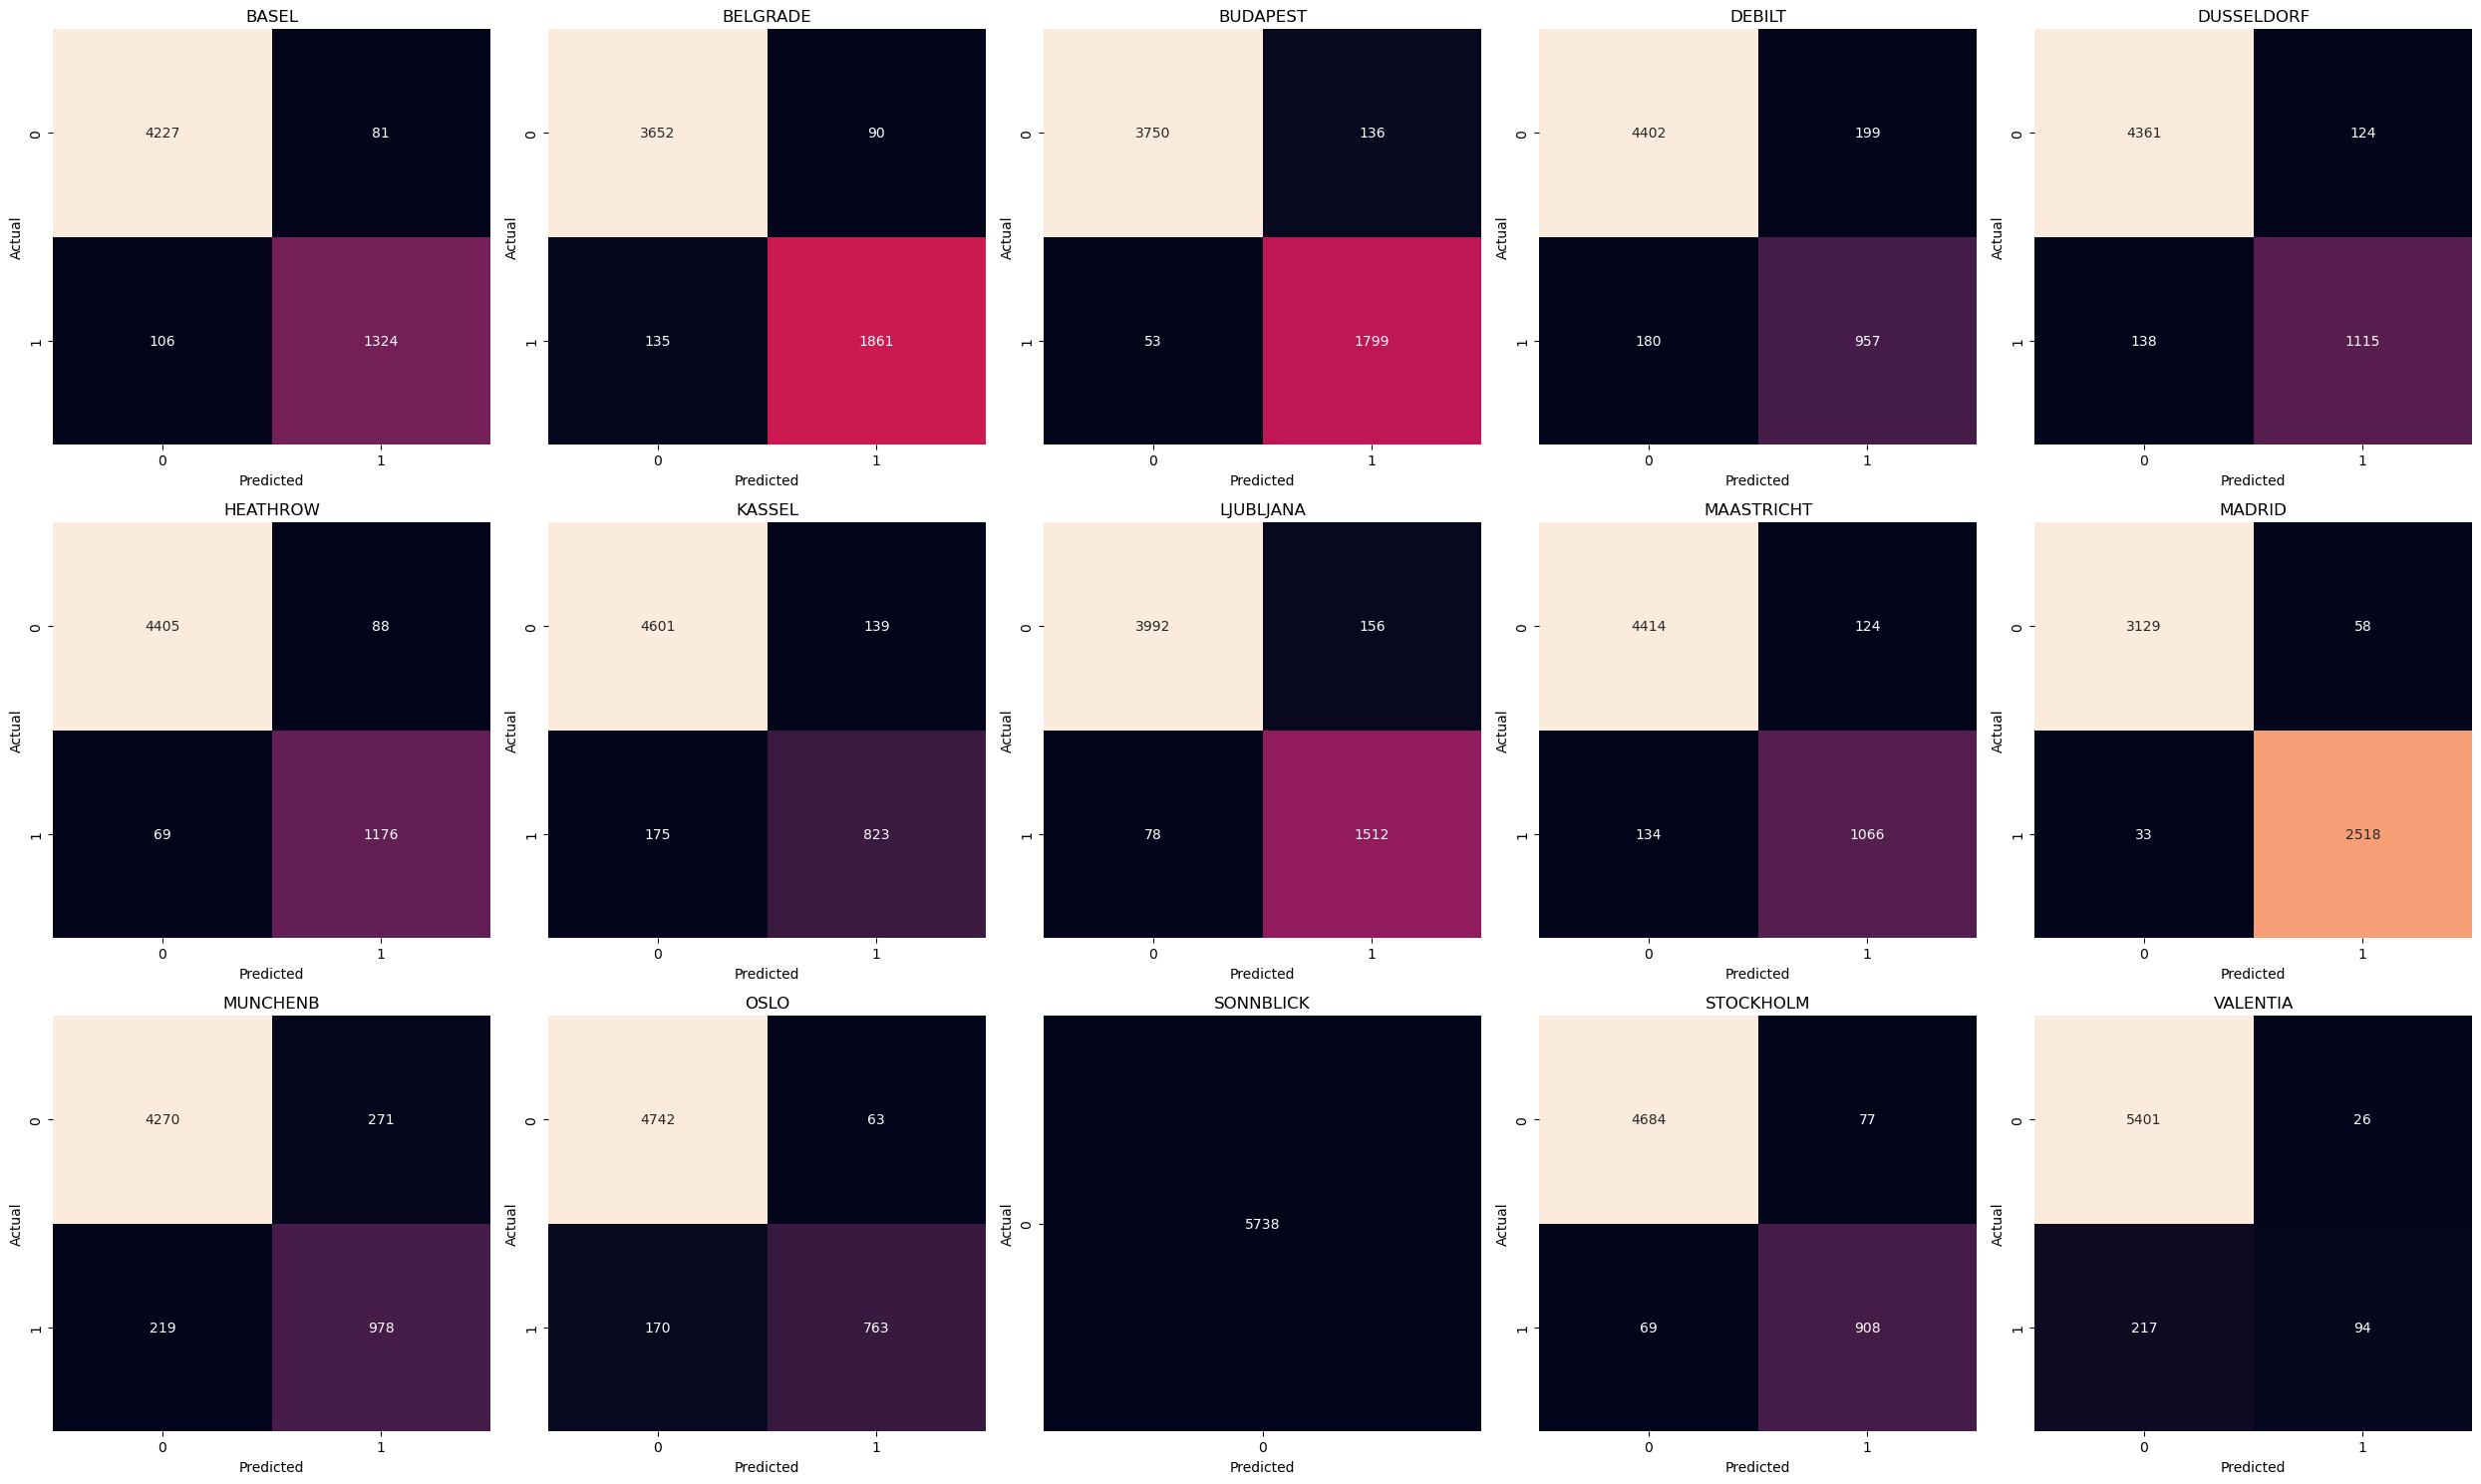

In [16]:
stations = y_test.columns
n_stations = len(stations)

fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.flatten()

for idx, station in enumerate(stations):
    y_true = y_test[station]
    y_pred = y_pred_test[station]

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        ax=axes[idx],
        cbar=False
    )

    axes[idx].set_title(station.replace("_pleasant_weather", ""))
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()